# Relation between k, number of points and classification accuracy

## Data generation

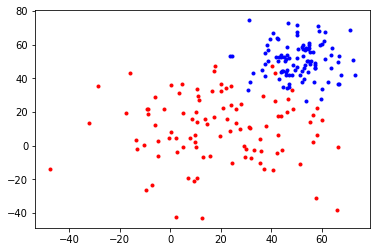

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
rand.seed()

n_points1 = 100
mu1 = (50, 50)
sigma1 = 10
n_points2 = 100
mu2 = (20, 10)
sigma2 = 20

points1 = [(rand.gauss(mu1[0], sigma1), rand.gauss(mu1[1], sigma1)) for i in range(n_points1)]
points2 = [(rand.gauss(mu2[0], sigma2), rand.gauss(mu2[1], sigma2)) for i in range(n_points2)]

plt.plot(*zip(*points1), 'b.', *zip(*points2), 'r.')
plt.show()

## Classification

Data is divided into two sets of equal size: a training set and a test set. The training set serves as a source for neighbor searching and the test set is used to measure classification accuracy.

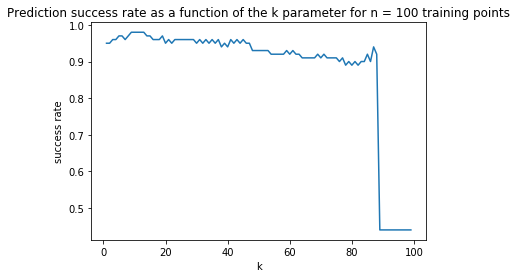

In [2]:
points = [[p, -1] for p in points1] + [[p, 1] for p in points2]
rand.shuffle(points)

def get_prediction_accuracy(k, points, metric = 'minkowski', p = 2):
    training_points = points[:len(points)//2]
    test_points = points[len(points)//2:]

    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors = k, metric = metric, p = p)
    knn.fit(*list(zip(*training_points)))
    
    X, y = list(zip(*test_points))
    predictions = knn.predict(X)

    return sum([1 if predictions[i] == y[i] else 0 for i in range(len(test_points))]) / len(test_points)

k_list = range(1, len(points) // 2)
preds = [get_prediction_accuracy(k, points) for k in k_list]

plt.plot(k_list, preds, '-')
plt.xlabel('k')
plt.ylabel('success rate')
plt.title('Prediction success rate as a function of the k parameter for n = {n} training points'.format(n=len(points)//2))
plt.show()